## Dependencies

In [1]:
# data-handling dependencies
from matplotlib import pyplot
import numpy as np
import os
import pandas as pd

In [2]:
# Sklearn scaling & splitting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image

## Loading and Preprocessing our Data

### Load the PlentyOfFish image data

In [27]:
strImgPath = '../ek_scrape/img/doctordata/MyCity'
lstImg = []
for root, dirs, lstFile in os.walk(strImgPath):
    for strFile in lstFile:
        if strFile[-4:] == '.png':
            img = pyplot.imread(strImgPath + '/' + strFile, format='jpg')
            arrImg = image.img_to_array(img)
            lstImg.append(arrImg)

In [5]:
arrX = np.array(lstImg)
arrX.shape

(226, 110, 110, 3)

In [6]:
dfY = pd.read_csv('doctordata_MyCity.csv')
arrY = np.array(dfY['interested'])
arrY.shape
arrY.ndim
arrY.shape

(226,)

In [9]:
# create Train and Test datasets
arrTrainX, arrTestX, arrTrainY, arrTestY = train_test_split(arrX, arrY, random_state=17) # , stratify=arrY

### For Logistic Regression, we want to flatten our data into rows of 1D image arrays

In [10]:
# transform the 110x110x3 pics to a flat 1D array
fltDimCount = arrTrainX.shape[1] * arrTrainX.shape[2] * arrTrainX.shape[3]
arrTrainX = arrTrainX.reshape(arrTrainX.shape[0], fltDimCount)
arrTestX = arrTestX.reshape(arrTestX.shape[0], fltDimCount)
print("Training Shape:", arrTrainX.shape)
print("Testing Shape:", arrTestX.shape)

Training Shape: (169, 36300)
Testing Shape: (57, 36300)


## Scaling and Normalization

In [11]:
# normalize training data
scaler = MinMaxScaler().fit(arrTrainX)
arrTrainX = scaler.transform(arrTrainX)
arrTestX = scaler.transform(arrTestX)

## Our first step is to create an empty sequential model

In [12]:
# Create an empty sequential model
model = Sequential()

## Create first hidden layer, 100 nodes

In [13]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=arrTrainX.shape[1]))

Instructions for updating:
Colocations handled automatically by placer.


## Create second hidden layer, 100 nodes

In [14]:
# Add a second hidden layer
model.add(Dense(100, activation='relu'))

## Our final output layer uses a `softmax` activation function for logistic regression.

We also need to specify the number of output classes. In this case, the number of digits that we wish to classify.

In [15]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(1, activation='softmax'))

## Compile and Train Model

In [16]:
# uses categorical hinge for "interested" (1) and "not interested" (0)
model.compile(optimizer='adam', 
              loss='categorical_hinge', 
              metrics=['accuracy'])

## Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [17]:
# Fit (train) the model
model.fit(
    arrTrainX,
    arrTrainY,
    epochs=10,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 2/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 3/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 4/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 5/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 6/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 7/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 8/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 9/10
 - 0s - loss: 1.7041 - acc: 0.1479
Epoch 10/10
 - 0s - loss: 1.7041 - acc: 0.1479


## Save model

In [18]:
# Save the model
model.save('pofmodel.h5')

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [19]:
# Evaluate the model using the training data 
fltLoss, fltAccuracy = model.evaluate(arrTestX, arrTestY, verbose=2)
print(f'Loss: {fltLoss}, Accuracy: {fltAccuracy}')

 - 0s - loss: 1.6842 - acc: 0.1579
Loss: 1.6842105409555268, Accuracy: 0.15789473056793213


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [20]:
# Grab just one data point to test with
test = np.expand_dims(arrTrainX[0], axis=0)
test.shape

(1, 36300)

In [21]:
# Make a prediction
model.predict(test).round()

array([[1.]], dtype=float32)

In [22]:
# Grab just one data point to test with
test = np.expand_dims(arrTrainX[2], axis=0)
test.shape

(1, 36300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


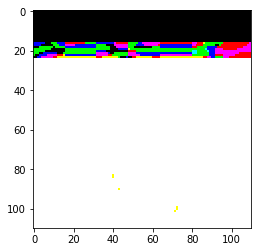

In [24]:
pyplot.imshow(lstImg[2])

In [ ]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

# Import a Custom Image

In [ ]:
filepath = "../Images/test8.png"

In [ ]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [ ]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

In [ ]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

In [ ]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
# Make predictions
model.predict_classes(img)